In [5]:
#MNIST Classification from scratch

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
import pandas as pd
path = "/content/drive/MyDrive/Dataset2/train.csv"
data = pd.read_csv(path)
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
import numpy as np
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [10]:
Y_train

array([7, 3, 9, ..., 2, 8, 2])

In [11]:
X_train[:,0].shape

(784,)

In [12]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10 ,1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10 ,1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 =W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def ReLU_deriv(Z):
    return Z > 0

def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hotY = one_hot(Y)
    dZ2 = A2 - one_hot(Y)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2


In [13]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [15]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[9 9 9 ... 6 9 9] [7 3 9 ... 2 8 2]
0.15553658536585366
Iteration:  10
[0 0 1 ... 6 1 1] [7 3 9 ... 2 8 2]
0.18697560975609756
Iteration:  20
[0 0 1 ... 6 1 1] [7 3 9 ... 2 8 2]
0.25446341463414635
Iteration:  30
[0 0 1 ... 6 1 1] [7 3 9 ... 2 8 2]
0.3294146341463415
Iteration:  40
[0 0 4 ... 6 1 1] [7 3 9 ... 2 8 2]
0.39758536585365856
Iteration:  50
[0 0 4 ... 6 1 1] [7 3 9 ... 2 8 2]
0.4543170731707317
Iteration:  60
[0 0 4 ... 6 1 1] [7 3 9 ... 2 8 2]
0.5031707317073171
Iteration:  70
[0 0 4 ... 6 1 1] [7 3 9 ... 2 8 2]
0.5473170731707317
Iteration:  80
[0 0 4 ... 6 1 1] [7 3 9 ... 2 8 2]
0.5846341463414634
Iteration:  90
[0 2 4 ... 6 1 1] [7 3 9 ... 2 8 2]
0.6156585365853658
Iteration:  100
[0 2 4 ... 6 1 1] [7 3 9 ... 2 8 2]
0.6408780487804878
Iteration:  110
[0 2 4 ... 6 1 1] [7 3 9 ... 2 8 2]
0.6624634146341464
Iteration:  120
[0 2 4 ... 6 1 1] [7 3 9 ... 2 8 2]
0.6796829268292683
Iteration:  130
[0 2 4 ... 6 1 1] [7 3 9 ... 2 8 2]
0.6938292682926829
Iteration:  1

In [16]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [7]
Label:  7


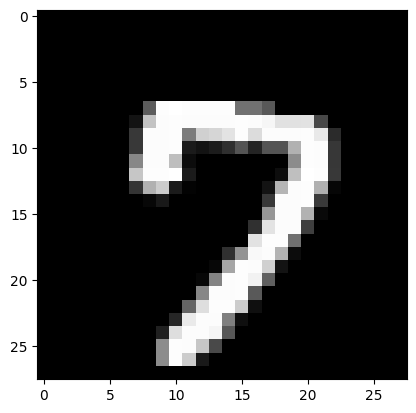

Prediction:  [2]
Label:  3


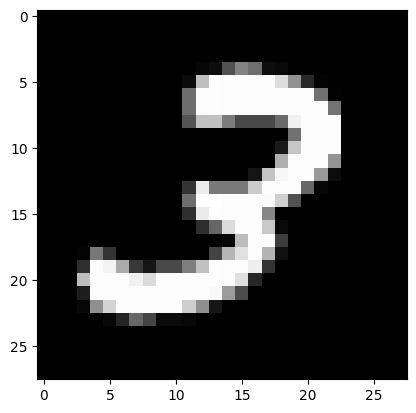

Prediction:  [4]
Label:  9


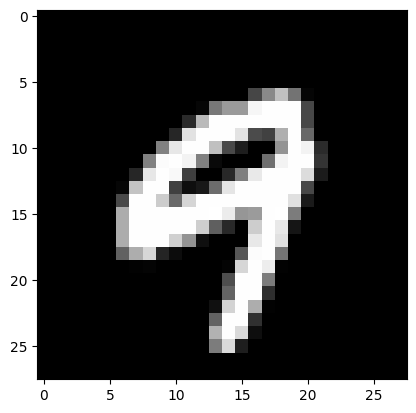

Prediction:  [6]
Label:  6


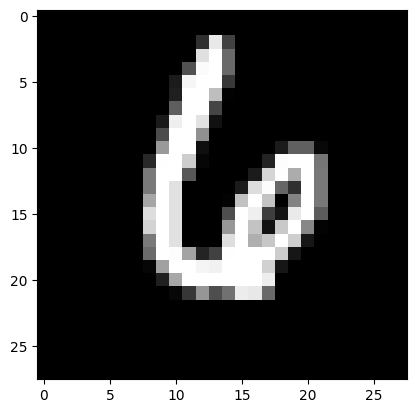

Prediction:  [0]
Label:  0


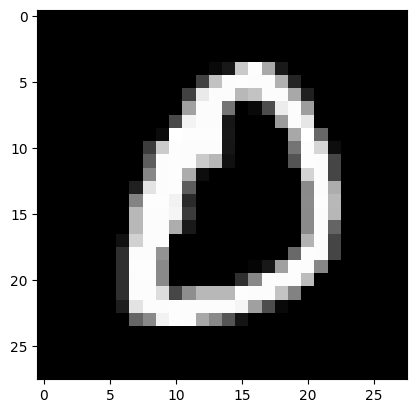

Prediction:  [1]
Label:  8


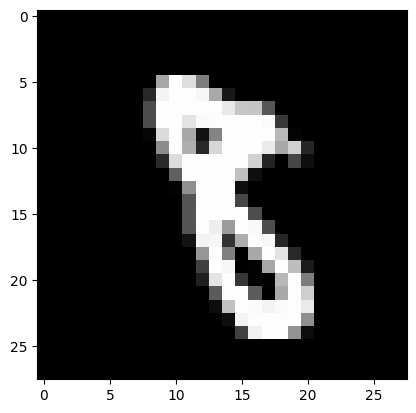

Prediction:  [4]
Label:  4


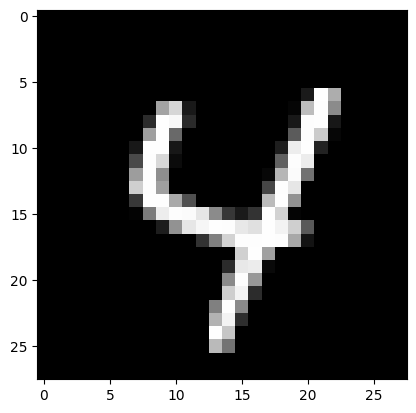

In [19]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)
test_prediction(4, W1, b1, W2, b2)
test_prediction(5, W1, b1, W2, b2)
test_prediction(6, W1, b1, W2, b2)

In [20]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[2 1 6 2 4 7 3 9 7 4 0 3 6 7 8 8 7 1 8 5 7 3 5 2 2 2 8 0 0 2 9 1 5 9 8 3 2
 9 8 0 0 3 5 9 6 2 5 0 6 6 9 1 8 4 0 3 8 0 1 5 1 5 7 9 8 0 2 5 4 7 2 8 2 1
 1 8 1 7 4 8 3 1 7 3 6 9 6 7 0 7 2 3 2 2 1 0 3 1 2 0 0 5 6 4 4 5 2 0 8 4 0
 6 9 1 2 7 6 0 6 0 0 9 1 1 8 1 7 9 5 2 1 1 8 9 5 2 3 9 8 7 3 1 8 2 0 6 5 3
 3 7 5 9 3 2 6 3 3 4 1 9 9 2 6 6 8 6 8 5 5 1 1 8 7 3 5 4 2 0 5 7 2 7 5 1 9
 8 1 8 8 6 6 8 8 3 1 2 8 6 5 0 5 4 8 3 7 6 8 0 0 1 3 8 6 0 6 6 1 3 2 6 3 7
 1 7 2 6 4 9 3 3 0 9 2 2 7 6 4 4 8 5 7 3 3 7 1 6 9 9 0 7 8 7 8 1 7 8 6 2 5
 1 2 1 3 4 3 1 7 1 4 1 8 2 4 9 4 8 6 1 2 9 6 6 9 3 8 5 1 7 4 0 5 9 4 0 3 5
 4 9 1 1 0 2 5 3 0 1 2 3 5 0 8 6 7 7 9 7 1 0 0 9 7 9 3 2 6 8 1 8 6 9 4 7 1
 0 3 8 1 6 7 7 1 3 9 5 5 3 1 0 6 0 1 8 3 9 3 1 0 3 4 3 1 3 5 8 9 1 3 5 5 9
 5 9 6 1 0 2 2 2 3 5 7 4 3 2 3 1 1 4 8 1 7 9 8 2 2 5 5 7 5 2 4 7 8 3 9 8 0
 4 0 1 6 3 3 0 9 2 0 9 5 8 6 9 1 3 9 9 6 4 7 5 3 4 8 7 6 3 3 7 3 9 4 5 1 4
 8 5 8 0 2 0 6 7 2 9 3 0 0 3 1 5 3 9 1 1 2 5 1 1 3 2 5 3 4 7 8 6 8 1 2 0 1
 3 2 7 4 5 1 9 5 1 9 9 3 

0.863